In [1]:

import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from plot_helper import collect_baseline_data, get_dict_experiment, get_our_df, get_param_plot, getting_our_data, NAME


pal = sns.color_palette()
list_colors_sns = pal.as_hex()
boo_name = 'Boostnet'
w_name = 'L2W-DEN'
our_name = 'JEI-DNN'

requested_alpha = 0.05


def get_combine_for_experiment(dataset, model):
    experiment_dict = get_dict_experiment(dataset, model)
    if experiment_dict is None:
        return None, None, None, None
    list_dicts_ours = experiment_dict[NAME.our_name.value]
    total_mudaa ,end_acc,L,end_plot_acc,line_acc,line_acc_label, lambda_val_1 = get_param_plot(dataset, model)
    for dicts in list_dicts_ours:
        
        if dataset == 'cifar100' and model == 't2t_14':
            lambda_val = dicts['lambda']
            if lambda_val == lambda_val_1:
                our_point_to_display = dicts
                print('got point 1')
        else:
            our_point_to_display = dicts
        



    our_df, cov_keys_dict, C_keys_dict = get_our_df(list_dicts_ours, requested_alpha)

    our_point_ic  = np.mean(our_point_to_display['test/total_cost'])
    our_point_acc  = np.mean(our_point_to_display['test/gated_acc'])
    boosted_df, boosted_points = collect_baseline_data(experiment_dict[NAME.boo_name.value], [our_point_ic, our_point_ic], requested_alpha, cov_keys_dict, C_keys_dict)
    boosted_df['method'] = NAME.boo_name.value


    weighted_df, weighted_points = collect_baseline_data(experiment_dict[NAME.w_name.value], [our_point_ic, our_point_ic], requested_alpha, cov_keys_dict, C_keys_dict)
    weighted_df['method'] = NAME.w_name.value


    boosted_point_ic  = np.mean(boosted_points[0]['average_IC'])
    boosted_point_acc  = np.mean(boosted_points[0]['ACC'])

    weighted_point_ic  = np.mean(weighted_points[0]['average_IC'])
    weighted_point_acc  = np.mean(weighted_points[0]['ACC'])





    # filtered_boosted_df = boosted_df[boosted_df['average_ACC'].between(end_plot_acc, end_acc)]
    # filtered_our_df = our_df[our_df['average_ACC'].between(end_plot_acc, end_acc)]
    # filtered_weighted_df = weighted_df[weighted_df['average_ACC'].between(end_plot_acc, end_acc)]
    #filtered_baseline_df   = baseline_df[baseline_df['average_ACC'].between(end_plot_acc, end_acc)]
    filtered_boosted_df = boosted_df[boosted_df['average_ACC'].between(0, end_acc)]
    filtered_our_df = our_df[our_df['average_ACC'].between(0, end_acc)]
    filtered_weighted_df = weighted_df[weighted_df['average_ACC'].between(0, end_acc)]

    filtered_boosted_df['average_IC']=filtered_boosted_df['average_IC']/total_mudaa
    filtered_weighted_df['average_IC']=filtered_weighted_df['average_IC']/total_mudaa
    filtered_our_df['average_IC']=filtered_our_df['average_IC']/total_mudaa
    boosted_point_ic=boosted_point_ic/total_mudaa
    weighted_point_ic=weighted_point_ic/total_mudaa
    our_point_ic = our_point_ic/total_mudaa

    combined_df = pd.concat([filtered_boosted_df, filtered_weighted_df, filtered_our_df],axis=0, ignore_index=True)
    return  combined_df, [[boosted_point_ic,weighted_point_ic, our_point_ic],[boosted_point_acc,weighted_point_acc, our_point_acc]],cov_keys_dict, C_keys_dict




sequential_training_cifar10_t2t_vit_7_seq_0.1_results.pk
sequential_training_cifar10_t2t_vit_7_seq_0.01_results.pk
sequential_training_cifar10_t2t_vit_7_seq_0.5_results.pk
09-27-2023-cifar10_0.25_results.pk
09-21-2023_cifar10_0.01_results.pk
09-21-2023_cifar10_0.7_results.pk
09-21-2023_cifar10_1.0_results.pk
09-21-2023_cifar10_3.0_results.pk
09-21-2023_cifar10_5.0_results.pk
09-21-2023_cifar10_0.1_results.pk
09-21-2023_cifar10_0.6_results.pk
sequential_training_cifar10_t2t_vit_7_seq_0.03_results.pk
09-21-2023_cifar10_0.8_results.pk
09-21-2023_cifar10_0.5_results.pk
09-21-2023_cifar10_2.0_results.pk
09-21-2023_cifar10_0.9_results.pk


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value


t2t_7 cifar10
t2t_7 cifar10
t2t_7 cifar10
couldnt get /home/floregol/git/dynn/src/notebooks/cifar10_t2t_14/t2t_vit_14_baseline_cifar10_results.pk
09-22-2023_cifar10_t2t_vit_14_3.0_results.pk
09-22-2023_cifar10_t2t_vit_14_0.7_results.pk
09-21-2023_cifar10_t2t_vit_14_0.6_results.pk
09-22-2023_cifar10_t2t_vit_14_5.0_results.pk
09-22-2023_cifar10_t2t_vit_14_2.0_results.pk
09-22-2023_cifar10_t2t_vit_14_0.8_results.pk
09-22-2023_cifar10_t2t_vit_14_0.9_results.pk
09-22-2023_cifar10_t2t_vit_14_1.0_results.pk
09-21-2023_cifar10_t2t_vit_14_0.5_results.pk
09-21-2023_cifar10_t2t_vit_14_0.1_results.pk
09-21-2023_cifar10_t2t_vit_14_0.01_results.pk


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value
/tmp/ipykernel_16159/3773510250.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

t2t_14 cifar10
t2t_14 cifar10
t2t_14 cifar10
couldnt get /home/floregol/git/dynn/src/notebooks/svhn_t2t_7/t2t_vit_7_baseline_svhn_results.pk
09-21-2023_svhn_4.0_results.pk
09-21-2023_svhn_1.5_results.pk
09-21-2023_svhn_6.0_results.pk
09-21-2023_svhn_3.0_results.pk
09-21-2023_svhn_0.3_results.pk
09-21-2023_svhn_0.9_results.pk
09-21-2023_svhn_0.05_results.pk
09-21-2023_svhn_2.0_results.pk
09-21-2023_svhn_0.1_results.pk
09-21-2023_svhn_0.6_results.pk
09-21-2023_svhn_0.8_results.pk
09-21-2023_svhn_5.0_results.pk


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value
/tmp/ipykernel_16159/3773510250.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

t2t_7 svhn
t2t_7 svhn
t2t_7 svhn
couldnt get /home/floregol/git/dynn/src/notebooks/svhn_t2t_14/t2t_vit_14_boosted_svhn_results.pk
couldnt get /home/floregol/git/dynn/src/notebooks/svhn_t2t_14/t2t_vit_14_baseline_svhn_results.pk
couldnt get /home/floregol/git/dynn/src/notebooks/svhn_t2t_14/t2t_vit_14_weighted_svhn_results.pk
dont have those /home/floregol/git/dynn/src/notebooks/svhn_t2t_14/
couldnt get /home/floregol/git/dynn/src/notebooks/cifar100_t2t_7/t2t_vit_7_baseline_cifar100_results.pk
09-24-2023_cifar100_t2t_vit_7_0.1_results.pk
09-24-2023_cifar100_t2t_vit_7_0.01_results.pk
09-24-2023_cifar100_t2t_vit_7_0.5_results.pk


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value


t2t_7 cifar100
t2t_7 cifar100
t2t_7 cifar100
couldnt get /home/floregol/git/dynn/src/notebooks/cifar100_t2t_14/t2t_vit_14_baseline_cifar100_results.pk
09-21-2023_cifar100_t2t_vit_14_0.6_results.pk
09-21-2023_cifar100_0.01_results.pk
09-22-2023_cifar100_t2t_vit_14_1.0_results.pk
09-22-2023_cifar100_t2t_vit_14_2.0_results.pk
09-21-2023_cifar100_t2t_vit_14_0.5_results.pk
09-22-2023_cifar100_t2t_vit_14_5.0_results.pk
09-21-2023_cifar100_t2t_vit_14_3.0_results.pk
09-21-2023_cifar100_t2t_vit_14_0.7_results.pk
09-22-2023_cifar100_t2t_vit_14_0.9_results.pk
09-21-2023_cifar100_t2t_vit_14_0.8_results.pk
09-21-2023_cifar100_t2t_vit_14_2.8_results.pk
09-21-2023_cifar100_t2t_vit_14_1.5_results.pk
got point 1


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value


t2t_14 cifar100
t2t_14 cifar100
t2t_14 cifar100
couldnt get /home/floregol/git/dynn/src/notebooks/cifar100LT_t2t_7/t2t_vit_7_baseline_cifar100LT_results.pk
09-24-2023_cifar100LT_t2t_vit_7_0.01_results.pk
09-24-2023_cifar100LT_t2t_vit_7_0.9_results.pk
09-24-2023_cifar100LT_t2t_vit_7_0.5_results.pk
09-24-2023_cifar100LT_t2t_vit_7_3.0_results.pk
09-24-2023_cifar100LT_t2t_vit_7_0.1_results.pk


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value


t2t_7 cifar100LT
t2t_7 cifar100LT
t2t_7 cifar100LT
couldnt get /home/floregol/git/dynn/src/notebooks/cifar100LT_t2t_14/t2t_vit_14_baseline_cifar100LT_results.pk
09-24-2023_cifar100LT_t2t_vit_14_3.0_results.pk
09-24-2023_cifar100LT_t2t_vit_14_0.5_results.pk
09-24-2023_cifar100LT_t2t_vit_14_0.1_results.pk
09-24-2023_cifar100LT_t2t_vit_14_0.01_results.pk
09-24-2023_cifar100LT_t2t_vit_14_0.9_results.pk


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value


t2t_14 cifar100LT
t2t_14 cifar100LT


/tmp/ipykernel_16159/674486887.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,4))


t2t_14 cifar100LT


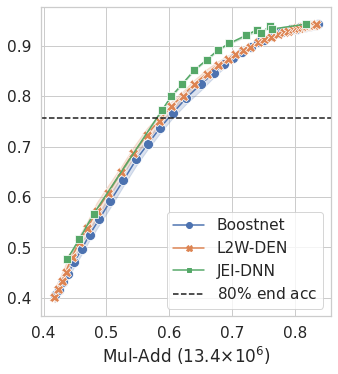

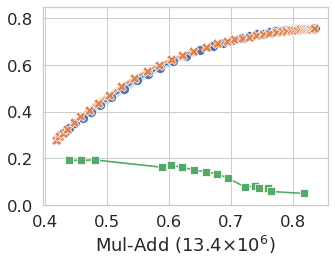

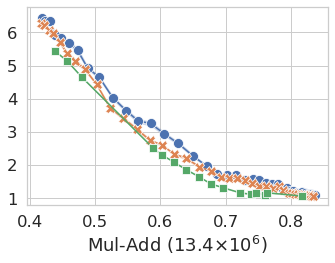

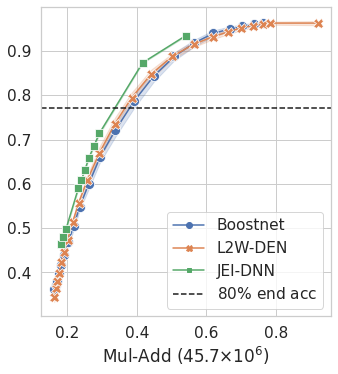

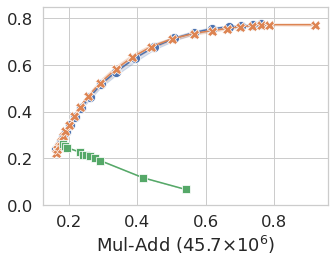

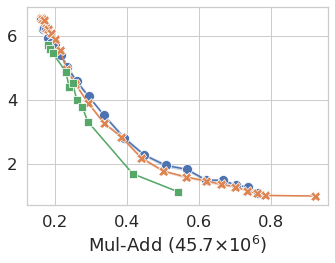

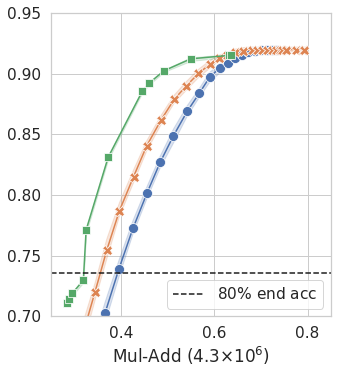

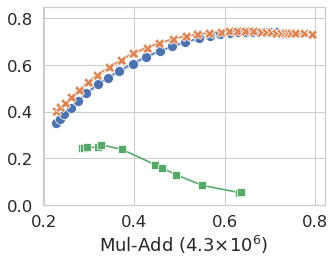

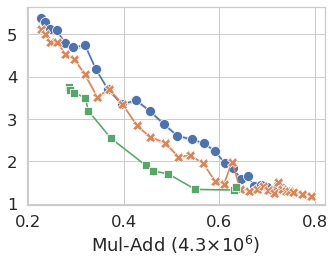

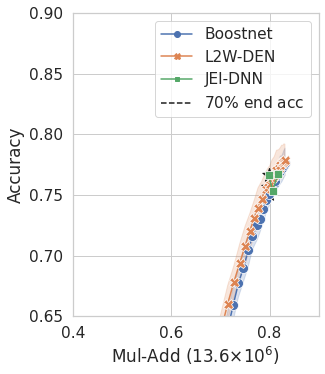

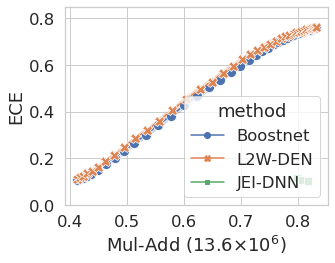

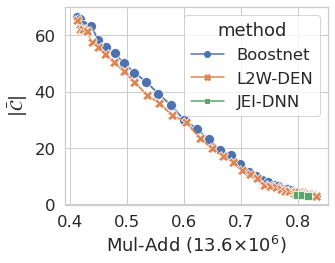

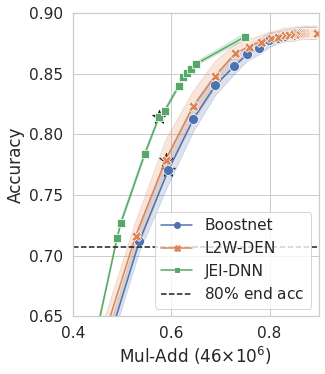

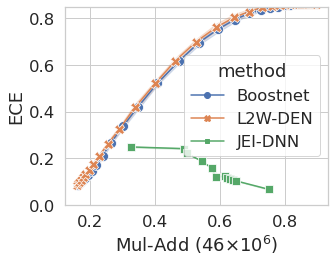

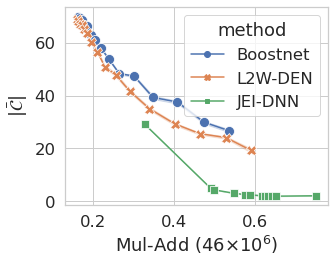

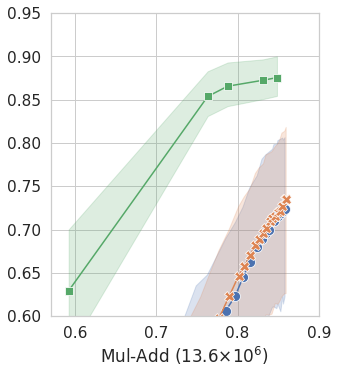

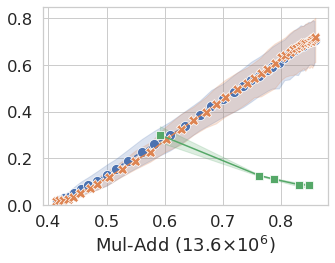

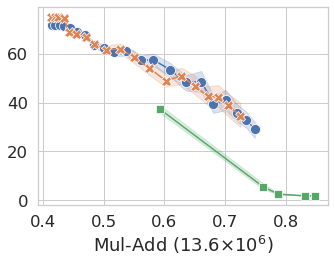

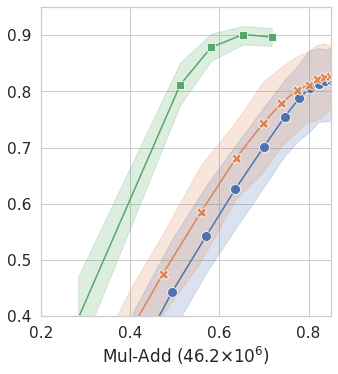

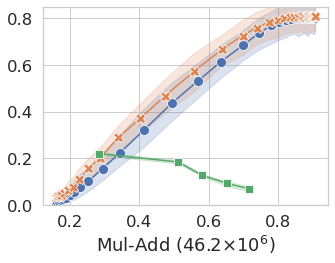

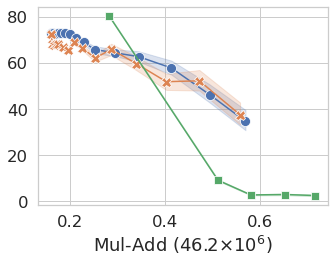

In [10]:
from matplotlib.lines import Line2D

appendix_mode = False
for dataset in ['cifar10','svhn','cifar100','cifar100LT']:
#for dataset in ['cifar100LT']:
    for model in ['t2t_7', 't2t_14']:
        combined_df,  list_points, cov_keys_dict, C_keys_dict=get_combine_for_experiment(dataset, model)
        
        if combined_df is not None:
            combined_df['ACC'] = combined_df['ACC']/100
            combined_df['ECE'] = combined_df['ECE']/100
            total_mudaa ,end_acc,L,end_plot_acc,line_acc,line_acc_label, lambda_val_1 = get_param_plot(dataset, model)
            plt.figure(figsize=(5,5.5))
            sns.set_theme(style="whitegrid",font_scale=1.4)
            sns.lineplot(data=combined_df, x="average_IC", y="ACC", hue="method", style="method",
                markers=True, dashes=False, markersize=10)
            if dataset!= 'cifar100LT':
                plt.axhline(y=line_acc/100, color='k',linestyle='--', label=line_acc_label)
            
            
            x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
            plt.xlabel(x_string)
            if appendix_mode:
                plt.ylabel('Accuracy')
                plt.legend()
            else:
                if dataset== 'cifar100':
                    plt.scatter(list_points[0],[a/100 for a in list_points[1]], s=200, color='k', marker="*")
                    plt.ylabel('Accuracy')
                    
                else:
                    plt.ylabel('')
                if dataset == 'svhn':
                    plt.ylim([0.7,0.95])
                    plt.xlim([0.25,0.85])
                    plt.legend([],[], frameon=False)
                    line = Line2D([0], [0], linestyle='--', label=line_acc_label, color='k')
                    plt.legend(handles=[line], loc='lower right')
                elif dataset== 'cifar10':
                    plt.legend()
                    #line = Line2D([0], [0], linestyle='--', label=line_acc_label, color='k')
                    #plt.legend(handles=[line], loc='lower right')
                elif dataset== 'cifar100':
                    plt.ylim([0.65,0.9])
                    plt.xlim([0.4,0.9])
                    plt.legend()
                elif dataset == 'cifar100LT' and model== 't2t_14':
                    plt.ylim([0.4,0.95])
                    plt.xlim([0.2,0.85])
                    plt.legend([],[], frameon=False)
#                     line = Line2D([0], [0], linestyle='--', label=line_acc_label, color='k')
#                     plt.legend(handles=[line])
                elif dataset == 'cifar100LT' and model== 't2t_7':
                    plt.ylim([0.6,0.95])
                    plt.xlim([0.57,0.9])
                    plt.legend([],[], frameon=False)
            print(model, dataset)
            plt.tight_layout()
#             plt.show()
#             plt.close()
            plt.savefig('figures/perf_cost_'+dataset+'_'+model+'.pdf')
           



            

            plt.figure(figsize=(5,4))
            sns.set_theme(style="whitegrid",font_scale=1.5)
            sns.lineplot(data=combined_df, x="average_IC", y="ECE", hue="method", style="method",
                markers=True, dashes=False, markersize=10)
            plt.ylim([0,0.85])
            if dataset== 'cifar100':
                plt.ylabel('ECE')
            else:
                plt.ylabel('')
                plt.legend([],[], frameon=False)
            plt.xlabel(x_string)
           
            print(model, dataset)
            plt.tight_layout()
#             plt.show()
#             plt.close()
            
            plt.savefig('figures/perf_ece_'+dataset+'_'+model+'.pdf')
#             plt.show()
#             plt.close()

            plt.figure(figsize=(5,4))
            sns.set_theme(style="whitegrid",font_scale=1.5)
            sns.lineplot(data=combined_df, x="average_IC", y='C_max_test/sets_gated_', hue="method", style="method",
                markers=True, dashes=False, markersize=10)

            if dataset== 'cifar100':
                plt.ylabel(r'$|\mathcal{\bar{C}}|$')
            else:
                plt.ylabel('')
                plt.legend([],[], frameon=False)
            plt.xlabel(x_string)
            print(model, dataset)
            plt.tight_layout()
#             plt.show()
#             plt.close()
            plt.savefig('figures/inef_IC_'+dataset+'_'+model+'.pdf')





In [12]:
def get_proper(cov_name):
    if cov_name=='test/sets_gated_strict_':
        return 'strict gating'
    elif cov_name== 'test/sets_gated_all_':
        return 'general'
    elif cov_name=='test/sets_gated_':
        return 'IMs'
    elif cov_name=='test/sets_general_':
        return 'general'

couldnt get /home/floregol/git/dynn/src/notebooks/cifar100_t2t_14/t2t_vit_14_baseline_cifar100_results.pk
09-21-2023_cifar100_t2t_vit_14_0.6_results.pk
09-21-2023_cifar100_0.01_results.pk
09-22-2023_cifar100_t2t_vit_14_1.0_results.pk
09-22-2023_cifar100_t2t_vit_14_2.0_results.pk
09-21-2023_cifar100_t2t_vit_14_0.5_results.pk
09-22-2023_cifar100_t2t_vit_14_5.0_results.pk
09-21-2023_cifar100_t2t_vit_14_3.0_results.pk
09-21-2023_cifar100_t2t_vit_14_0.7_results.pk
09-22-2023_cifar100_t2t_vit_14_0.9_results.pk
09-21-2023_cifar100_t2t_vit_14_0.8_results.pk
09-21-2023_cifar100_t2t_vit_14_2.8_results.pk
09-21-2023_cifar100_t2t_vit_14_1.5_results.pk
got point 1


/tmp/ipykernel_16159/3773510250.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = NAME.boo_name.value
/tmp/ipykernel_16159/3773510250.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = NAME.w_name.value


test/sets_gated_strict_
test/sets_gated_all_
test/sets_gated_
test/sets_general_
test/sets_gated_strict_
test/sets_gated_all_
test/sets_gated_
test/sets_general_
test/sets_gated_strict_
test/sets_gated_all_
test/sets_gated_
test/sets_general_


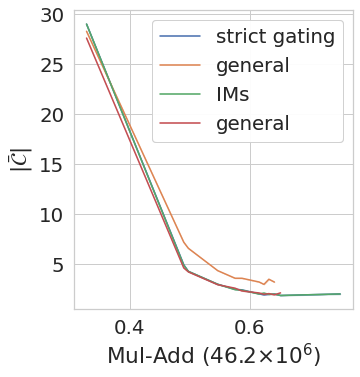

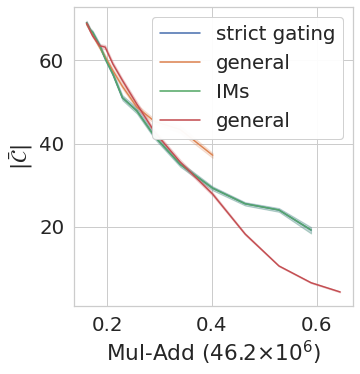

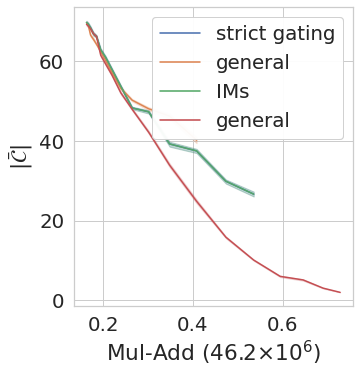

In [17]:
combined_df,  list_points, cov_keys_dict, C_keys_dict=get_combine_for_experiment('cifar100', 't2t_14')
for name_method in [our_name, w_name, boo_name]:
    plt.figure(figsize=(5,5.5))
    sns.set_theme(style="whitegrid",font_scale=1.8)
    for cov_name in list(cov_keys_dict.keys())[::-1]:
        print(cov_name)
        s = combined_df[combined_df['method']==name_method]
        sns.lineplot(data=s, x="average_IC", y='C_max_'+cov_name,label=cov_name,
        markers=True, dashes=False, markersize=10)
        plt.legend([],[], frameon=False)

    legend1 = plt.legend([get_proper(a) for a in list(cov_keys_dict.keys())[::-1]])
    plt.gca().add_artist(legend1)
    x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
    plt.xlabel(x_string)
    plt.ylabel(r'$|\mathcal{\bar{C}}|$')
    plt.savefig('figures/conf'+name_method+'.pdf')

#     plt.close()
#     combined_df['C_max_'+cov_name]
#     combined_df['emp_alpha_'+cov_name]

C_max_test/sets_general_
C_max_test/sets_gated_
C_max_test/sets_gated_all_
C_max_test/sets_gated_strict_


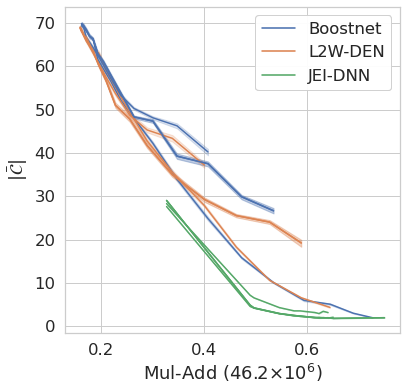

In [18]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid",font_scale=1.5)
for cov_name in cov_keys_dict.keys():
    print('C_max_'+cov_name)
    combined_df['C_max'] = combined_df['C_max_'+cov_name]
    sns.lineplot(data=combined_df, x="average_IC", y='C_max',hue='method')
    plt.legend([],[], frameon=False)
# line = Line2D([0], [0], linestyle='-', label=line_acc_label, color=list_colors_sns[0])
# plt.legend(handles=[line], loc='lower right')
legend1 = plt.legend([boo_name , w_name,our_name ])
plt.gca().add_artist(legend1)
x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
plt.xlabel(x_string)
plt.ylabel(r'$|\mathcal{\bar{C}}|$')
plt.savefig('figures/all_conformal.pdf')

In [19]:

weighted_df_emp_vs_req = pd.DataFrame()
boosted_df_emp_vs_req = pd.DataFrame()
our_df_emp_vs_req = pd.DataFrame()


boosted_df = combined_df[combined_df['method'] == 'Boostnet']
weighted_df = combined_df[combined_df['method'] == 'L2W-DEN']
our_df = combined_df[combined_df['method'] == 'JEI-DNN']
cov_keys = cov_keys_dict['test/sets_gated_']
for cov_key in cov_keys:
    alpha = float(cov_key.split('alpha_')[-1])
    print(alpha)
    boosted_df_cov = pd.DataFrame()
    boosted_df_cov['emp_alpha'] = boosted_df[cov_key]
    boosted_df_cov['requested_alpha'] = alpha
    boosted_df_emp_vs_req = pd.concat([boosted_df_cov, boosted_df_emp_vs_req],axis=0, ignore_index=True)

    df_cov = pd.DataFrame()
    df_cov['emp_alpha'] = weighted_df[cov_key]
    df_cov['requested_alpha'] = alpha
    weighted_df_emp_vs_req = pd.concat([df_cov, weighted_df_emp_vs_req],axis=0, ignore_index=True)

    df_cov = pd.DataFrame()
    df_cov['emp_alpha'] = our_df[cov_key]
    df_cov['requested_alpha'] = alpha
    our_df_emp_vs_req = pd.concat([df_cov, our_df_emp_vs_req],axis=0, ignore_index=True)












0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05


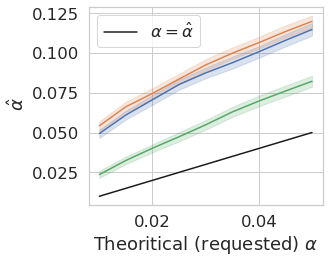

In [22]:
x = [0.01,0.05]
y = [0.01,0.05]
plt.figure(figsize=(5,4))
sns.set_theme(style="whitegrid",font_scale=1.5)
plt.plot(x,y, color='k',label=r'$\alpha = \hat{\alpha}$')
sns.lineplot(data=boosted_df_emp_vs_req, x="requested_alpha", y="emp_alpha")
sns.lineplot(data=weighted_df_emp_vs_req, x="requested_alpha", y="emp_alpha")
sns.lineplot(data=our_df_emp_vs_req, x="requested_alpha", y="emp_alpha")
plt.xlabel(r'Theoritical (requested) $\alpha$')
plt.ylabel(r' $\hat{\alpha}$')
plt.tight_layout()
plt.savefig('figures/emp_vs_theoritical_'+dataset+'.pdf')